# ExplainableRL: Onboarding recipe

In [1]:
! pip install explainable-rl

In [2]:
from library import *

# Initialisation

In [4]:
# Load data
dataset = utils.load_data(data_path=hyperparam_dict['dataset']['data_path'],
                          n_samples=hyperparam_dict['dataset']['n_samples'],
                          delimiter=hyperparam_dict['dataset']['col_delimiter'])

In [5]:
# Split in train and test sets
train_dataset, test_dataset = utils.split_train_test(dataset)

In [6]:
# Initialise DataHandler
dh = DataHandler(hyperparam_dict=hyperparam_dict,
                 dataset=train_dataset,
                 test_dataset=test_dataset)

In [7]:
# Initialise Engine
engine = Engine(dh=dh, hyperparam_dict=hyperparam_dict)

In [8]:
# Initialise Agent and Environment
engine.create_world()

# Training

In [9]:
# Train the Agent
engine.train_agent()

100%|██████████| 10000/10000 [00:08<00:00, 1230.52it/s]


# Evaluation

In [10]:
# Load lists of Agents to evaluate
engines = utils.load_engine([
    'runs3/q_learner_00.pkl',
    'runs3/q_learner_0.pkl',
    'runs3/q_learner_1.pkl',
    'runs3/double_q_learner_0.pkl',
    'runs3/double_q_learner_1.pkl',
    'runs3/sarsa_0.pkl',
    'runs3/sarsa_1.pkl',
])

In [11]:
# Initialise Evaluator
evaluator = Evaluator(engines = engines)

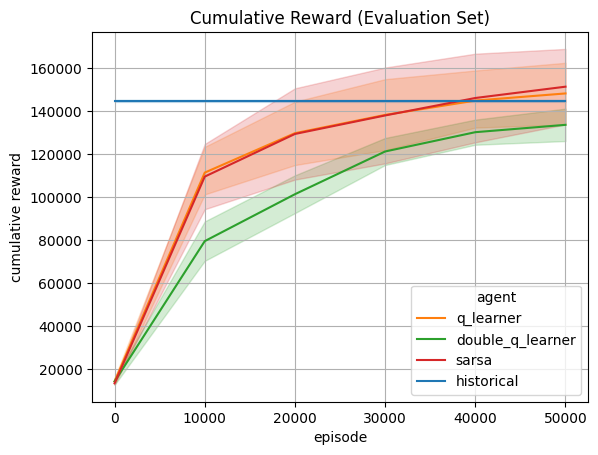

In [12]:
# Plot cumulative reward versus the episodes
evaluator.plot_training_curve()

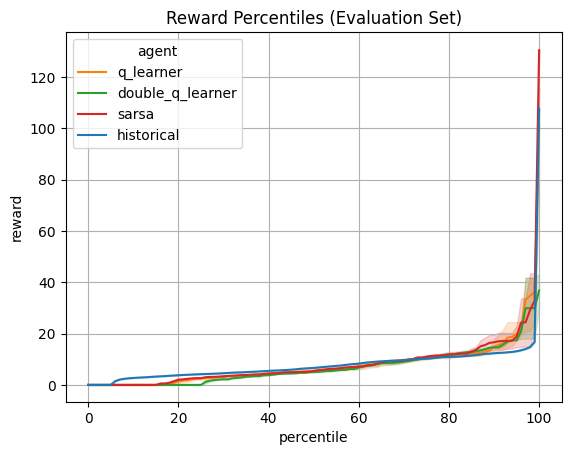

In [13]:
# Plot average rewards distribution
evaluator.plot_reward_distribution()

# Explainability

In [14]:
# Plot PDPs
pdp = PDP(engine=engines[0])
pdp.build_data_for_plots()

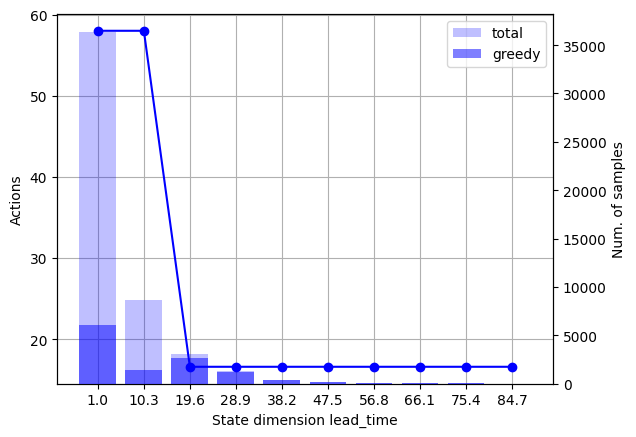

In [15]:
# Plot PDP for feature lead_time (length_of_stay, competitor_price_difference_bin, demand_bin)
fig_name = "PDP plots - lead_time"
pdp.plot_pdp(feature="lead_time", fig_name=fig_name, savefig=False)

In [25]:
# Compute SHAP values
shap_values = ShapValues(engine=engines[0])

In [30]:
sample = [8, 1, 1, 1]
shaps, predicted_action = shap_values.compute_shap_values(sample=sample)

In [31]:
print("Shap values: ", shaps)
print("Predicted action: ", predicted_action)

Shap values:  {'lead_time': 2.116, 'length_of_stay': -7.268, 'competitor_price_difference_bin': 3.588, 'demand_bin': -1.288}
Predicted action:  16.6


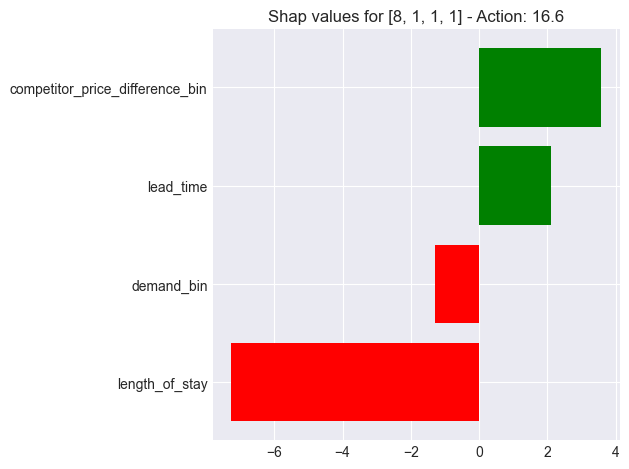

In [32]:
# Plot SHAP values
shap_values.plot_shap_values(sample=sample,
                             shap_values=shaps,
                             predicted_action=predicted_action,
                             fig_name="SHAP values",
                             savefig=False)

# Performance evaluation

In [20]:
# User-defined parameters
results_path = "performance-evaluations"
num_sample_range=[int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
num_ep_range = [int(1e1), int(1e2), int(1e3), int(1e5)]
num_bin_range=[10, 20, 50, 100]

In [21]:
# Instantiate PerformanceEvaluator
performance_evaluator = PerformanceEvaluator(results_path="performance-evaluations",
                                             num_sample_range=num_sample_range,
                                             num_ep_range=num_ep_range,
                                             num_bin_range=num_bin_range,
                                             verbose=True)


GETTING BENCHMARK PERFORMANCE
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 771.24it/s]



GETTING PERFORMANCE GRAPHS
* Plot of performance vs number of samples
-> Running training loop for 10 episodes, 10 bins, 100 samples


100%|██████████| 10/10 [00:00<00:00, 686.30it/s]


-> Running training loop for 10 episodes, 10 bins, 1000 samples


100%|██████████| 10/10 [00:00<00:00, 673.13it/s]


-> Running training loop for 10 episodes, 10 bins, 10000 samples


100%|██████████| 10/10 [00:00<00:00, 706.28it/s]


-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 757.11it/s]


-> Running training loop for 10 episodes, 10 bins, 1000000 samples


100%|██████████| 10/10 [00:00<00:00, 536.53it/s]


* Plot of performance vs number of episodes
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 605.85it/s]


-> Running training loop for 100 episodes, 10 bins, 100000 samples


100%|██████████| 100/100 [00:00<00:00, 722.59it/s]


-> Running training loop for 1000 episodes, 10 bins, 100000 samples


100%|██████████| 1000/1000 [00:01<00:00, 649.66it/s]


-> Running training loop for 100000 episodes, 10 bins, 100000 samples


100%|██████████| 100000/100000 [04:46<00:00, 348.66it/s]


* Plot of performance vs number of bins
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 695.76it/s]


-> Running training loop for 10 episodes, 20 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 755.98it/s]


-> Running training loop for 10 episodes, 50 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 687.62it/s]


-> Running training loop for 10 episodes, 100 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 682.22it/s]



GETTING TIME BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 521.46it/s]



GETTING SPACE BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 646.58it/s]


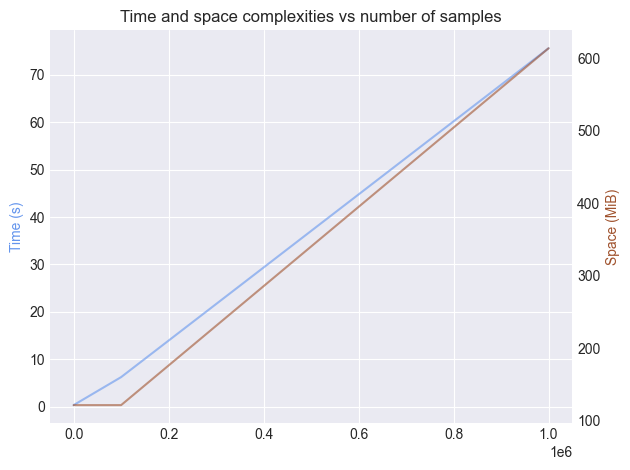

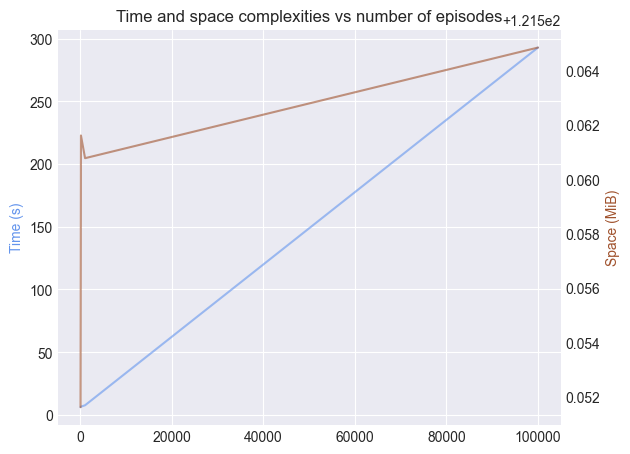

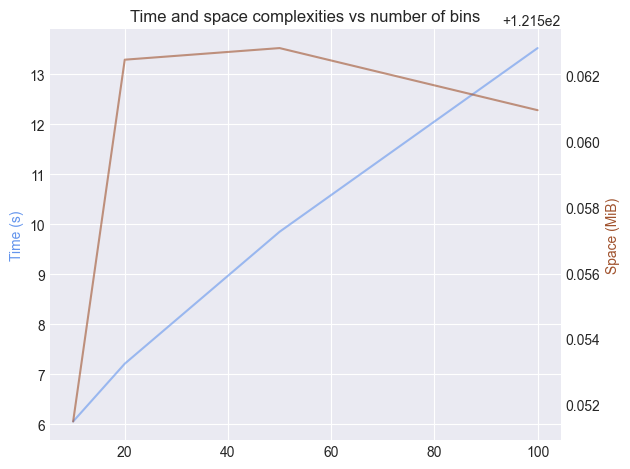

In [22]:
# Get results
performance_evaluator.get_all_performance_evaluations()

# Documentation

In [23]:
## Update documentation

# Go to documentation folder
os.chdir("documentation")

# Automatically update the documentation
! make html

# Go back to repository root
os.chdir("..")

Running Sphinx v5.0.2
loading pickled environment... done
building [mo]: targets for 0 po files that are out of date
building [html]: targets for 19 source files that are out of date
updating environment: 0 added, 19 changed, 0 removed
reading sources... [100%] tests.test_foundation                                 
looking for now-outdated files... none found
pickling environment... done
checking consistency... done
preparing documents... done
writing output... [100%] tests.test_foundation                                  
generating indices... genindex py-modindex done
highlighting module code... [100%] tests.test_foundation.test_utils             n
writing additional pages... search done
copying static files... done
copying extra files... done
dumping search index in English (code: en)... done
dumping object inventory... done
build succeeded, 1 warning.

The HTML pages are in _build/html.


In [24]:
## Access documentation

# Go to the html sub-folder of the documentation
os.chdir("documentation/_build/html")

# Open the documentation at the index page
! open index.html

# Go back to repository root
os.chdir("../../..")

In [24]:
warnings.filterwarnings("ignore") # DELETE